In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
print(os.listdir())

['FIRSTTESTFILE.log', 'Bike.ai ride thresholding.ipynb', 'ride_thresholding.ipynb', 'TESTFILE.log', 'cruise_11_1_2019.log', '.ipynb_checkpoints']


In [2]:
time = []
x = []
with open ("TESTFILE.LOG") as file:
    for index,line in enumerate(file.readlines()):
        if len(line.split(",")[0][2:][:-1]) > 10 or line.split(",")[0][3:][0] == "-":
            continue
        x.append(float(line.split(",")[0][2:][:-1].replace(",","")))
        time.append(index)


# We propose the following method for automatically detecting deceleration
## The first is if one of the last 5 points was negative(deceleration) then we will evaluate if the difference between the mean of the rolling averages is greater than some threshold and if so, emit a positive signal for braking
## The second is that we will have absolute thresholds upon which always qualify as braking, we recognize that due to static friction, if any force occured over -1G in the x direction, the bike would have to stop due to the law of physics. We can afford to be more generous in this direction
## The third is that we can track the the ratio of a current reading from the accelerometer with respect to the mean of the 20 points before it(1 second) and see if this above a certain threshold we have a deceleration spike.

In [ ]:
#METHOD 1

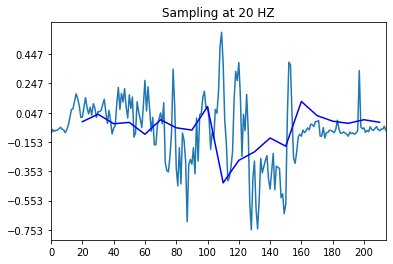

In [23]:
plt.plot(time,x)
plt.xticks(np.arange(0, len(time), 20.0))
plt.yticks(np.arange(min(x), max(x), 0.2))
plt.title("Sampling at 20 HZ")

temp = pd.DataFrame(columns=['time', 'acceleration'])
temp["time"] = np.array(time)
temp["acceleration"] = np.array(x)

# Rolling Average Point of Analysis
# calculate a 20 second rolling mean and plot
#temp["acceleration"].rolling(window=10,center=False).mean().plot(style='g')
#temp["acceleration"].rolling(window=5,center=False).mean().plot(style='y')
# add the 20 second rolling variance
#temp["acceleration"].rolling(window=20,center=False).mean().plot(style='r')
(abs(temp["acceleration"].rolling(window=20,center=False).mean())-abs(temp["acceleration"].rolling(window=2,center=False).mean()))[::10].plot(style='b')


plt.show()


In [ ]:
# METHOD 3

In [ ]:
import seaborn as sns
sns.regplot(x=temp["time"], y=temp["acceleration"],fit_reg=False)
plt.title("Sampling at 20 HZ")
plt.show()



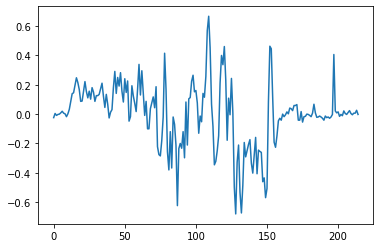

In [6]:
plt.plot(x-np.mean(x))
#plt.plot(time,x)
#plt.xticks(np.arange(0, len(time), 20.0))
#plt.yticks(np.arange(min(x), max(x), 0.2))
#plt.title("Sampling at 20 HZ")
plt.show()


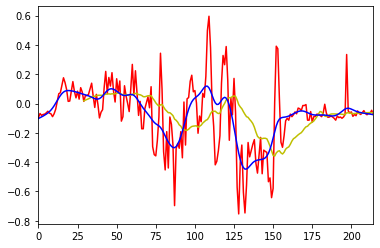

In [7]:
import scipy.signal as signal
# First, design the Buterworth filter
N  = 2    # Filter order
Wn = 0.1 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
smooth_data = signal.filtfilt(B,A,x)
plt.plot(x[0:500],'r-')
temp["acceleration"].rolling(window=30,center=False).mean().plot(style='y')
plt.plot(smooth_data[0:500],'b-')
plt.show()
# Thresholds should be that 0.2 and or above in the negative direction will be a break